In [1]:
# Required Libraries
import pandas as pd, numpy as np # For Data Manipulation
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # For Encoding Categorical Data [Nominal | Ordinal]
from sklearn.preprocessing import OneHotEncoder # For Creating Dummy Variables of Categorical Data [Nominal]
from sklearn.impute import SimpleImputer, KNNImputer # For Imputation of Missing Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # For Rescaling Data
from sklearn.model_selection import train_test_split # For Splitting Data into Training & Testing Sets

In [2]:
df=pd.read_csv("mlm_project_1_dataset.csv")
df

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Gakondo,Adventure,0.0,0.0,10,10.0,15,True,0.0,USD,10M,7.1 and up,Everyone,False,False,False
1,Ampere Battery Info,Tools,4.4,64.0,"5,000",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,Everyone,True,False,False
2,Vibook,Productivity,0.0,0.0,50,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,Everyone,False,False,False
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,10,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,Everyone,True,False,False
4,GROW.me,Tools,0.0,0.0,100,100.0,478,True,0.0,USD,6.2M,4.1 and up,Everyone,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99984,Hot CInemax HD - Watch Movie Online For FREE,Entertainment,4.8,692.0,"10,000",10000.0,45612,True,0.0,USD,7.3M,6.0 and up,Teen,True,False,False
99985,Learn German - German Instant Translation,Education,0.0,0.0,"1,000",1000.0,1036,True,0.0,USD,30M,4.1 and up,Everyone,True,True,False
99986,Japanese Kanji Image Flashcards,Education,4.4,13.0,"1,000",1000.0,2560,True,0.0,USD,33M,4.1 and up,Everyone,False,True,False
99987,Day Timer - Day Countdown Widget & Date Calcul...,Productivity,5.0,23.0,"1,000",1000.0,1369,True,0.0,USD,24M,8.0 and up,Everyone,False,False,False


In [3]:
# Data Bifurcation
df_cat = df[['Category', 'Currency', 'Minimum Android', 'Content Rating', 'Free', 'Ad Supported', 'In App Purchases', 'Editors Choice']] # Categorical Data [Nominal | Ordinal]
df_noncat = df[['Rating', 'Rating Count', 'Installs', 'Minimum Installs', 'Maximum Installs', 'Price', 'Size']] # Non-Categorical Data

In [4]:
# Dataset Used : df

df.info() # Dataframe Information (Provide Information on Missing Data)
variable_missing_data = df.isna().sum(); variable_missing_data # Variable-wise Missing Data Information
record_missing_data = df.isna().sum(axis=1).sort_values(ascending=False).head(5); record_missing_data # Record-wise Missing Data Information (Top 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App Name          99988 non-null  object 
 1   Category          99989 non-null  object 
 2   Rating            99002 non-null  float64
 3   Rating Count      99002 non-null  float64
 4   Installs          99982 non-null  object 
 5   Minimum Installs  99982 non-null  float64
 6   Maximum Installs  99989 non-null  int64  
 7   Free              99989 non-null  bool   
 8   Price             99989 non-null  float64
 9   Currency          99981 non-null  object 
 10  Size              99981 non-null  object 
 11  Minimum Android   99699 non-null  object 
 12  Content Rating    99989 non-null  object 
 13  Ad Supported      99989 non-null  bool   
 14  In App Purchases  99989 non-null  bool   
 15  Editors Choice    99989 non-null  bool   
dtypes: bool(4), float64(4), int64(1), object

96073    5
37039    5
70044    5
70770    5
95695    5
dtype: int64

In [5]:
# 1.2. Missing Data Treatment
# ---------------------------

# 1.2.1. Impute Missing Categorical Data [Nominal | Ordinal] using Descriptive Satatistics : Central Tendency (Mode)
# ------------------------------------------------------------------------------------------------------------------

# Dataset Used : df_cat

si_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent') # Strategy = median [When Odd Number of Categories Exists]
si_cat_fit = si_cat.fit_transform(df_cat)
df_cat_mdi = pd.DataFrame(si_cat_fit, columns=df_cat.columns); df_cat_mdi # Missing Categorical Data Imputed Subset
print(df_cat_mdi.info())
print(df_cat_mdi)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Category          99989 non-null  object
 1   Currency          99989 non-null  object
 2   Minimum Android   99989 non-null  object
 3   Content Rating    99989 non-null  object
 4   Free              99989 non-null  object
 5   Ad Supported      99989 non-null  object
 6   In App Purchases  99989 non-null  object
 7   Editors Choice    99989 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None
              Category Currency Minimum Android Content Rating  Free  \
0            Adventure      USD      7.1 and up       Everyone  True   
1                Tools      USD      5.0 and up       Everyone  True   
2         Productivity      USD    4.0.3 and up       Everyone  True   
3        Communication      USD    4.0.3 and up       Everyone  True   
4                Tools     

In [6]:
# Convert 'Rating' column to numeric, handle NaN
si_noncat = SimpleImputer(missing_values=np.nan, strategy='most_frequent') # Other Strategy : mean | median | most_frequent | constant
si_noncat_fit = si_noncat.fit_transform(df_noncat)
df_noncat_mdi_si = pd.DataFrame(si_noncat_fit, columns=df_noncat.columns); df_noncat_mdi_si # Missing Non-Categorical Data Imputed Subset using Simple Imputer
print(df_noncat_mdi_si.info())
print(df_noncat_mdi_si)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rating            99989 non-null  object
 1   Rating Count      99989 non-null  object
 2   Installs          99989 non-null  object
 3   Minimum Installs  99989 non-null  object
 4   Maximum Installs  99989 non-null  object
 5   Price             99989 non-null  object
 6   Size              99989 non-null  object
dtypes: object(7)
memory usage: 5.3+ MB
None
      Rating Rating Count Installs Minimum Installs Maximum Installs Price  \
0        0.0          0.0       10             10.0               15   0.0   
1        4.4         64.0    5,000           5000.0             7662   0.0   
2        0.0          0.0       50             50.0               58   0.0   
3        5.0          5.0       10             10.0               19   0.0   
4        0.0          0.0      100         

In [7]:
# Using Scikit Learn : Ordinal Encoder (Superior)
#Numeric Encoding of Categorical Data [Nominal & Ordinal]
df_cat_mdt_code = df_cat_mdi.copy()
oe = OrdinalEncoder()
oe_fit = oe.fit_transform(df_cat_mdt_code)
df_cat_code_oe = pd.DataFrame(oe_fit, columns=['Category_code', 'Currency_code', 'Minimum Android_code', 'Content Rating_code', 'Free_code', 'Ad Supported_code', 'In App Purchases_code', 'Editors Choice_code']); df_cat_code_oe
df_cat_mdt_code_oe = df_cat_mdt_code.join(df_cat_code_oe); df_cat_mdt_code_oe # (Missing Data Treated) Numeric Coded Categorical Dataset using Scikit Learn Ordinal Encoder
df_cat_mdt_code_oe = pd.merge(df_cat_mdt_code, df_cat_code_oe, left_index=True, right_index=True);
df_cat_mdt_code_oe

,Category,Currency,Minimum Android,Content Rating,Free,Ad Supported,In App Purchases,Editors Choice,Category_code,Currency_code,Minimum Android_code,Content Rating_code,Free_code,Ad Supported_code,In App Purchases_code,Editors Choice_code
0,Adventure,USD,7.1 and up,Everyone,True,False,False,False,1.0,0.0,37.0,1.0,1.0,0.0,0.0,0.0
1,Tools,USD,5.0 and up,Everyone,True,True,False,False,42.0,0.0,33.0,1.0,1.0,1.0,0.0,0.0
2,Productivity,USD,4.0.3 and up,Everyone,True,False,False,False,33.0,0.0,23.0,1.0,1.0,0.0,0.0,0.0
3,Communication,USD,4.0.3 and up,Everyone,True,True,False,False,13.0,0.0,23.0,1.0,1.0,1.0,0.0,0.0
4,Tools,USD,4.1 and up,Everyone,True,False,False,False,42.0,0.0,28.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99984,Entertainment,USD,6.0 and up,Teen,True,True,False,False,17.0,0.0,35.0,4.0,1.0,1.0,0.0,0.0
99985,Education,USD,4.1 and up,Everyone,True,True,True,False,15.0,0.0,28.0,1.0,1.0,1.0,1.0,0.0
99986,Education,USD,4.1 and up,Everyone,True,False,True,False,15.0,0.0,28.0,1.0,1.0,0.0,1.0,0.0
99987,Productivity,USD,8.0 and up,Everyone,True,False,False,False,33.0,0.0,38.0,1.0,1.0,0.0,0.0,0.0


In [8]:
#Data Transformation & Rescaling [Treatment of Outliers]

# Dataset Used : df_noncat_mdt

# Scaling Variable : income

# 3.1. Standardization
ss = StandardScaler()
ss_fit = ss.fit_transform(df_noncat_mdi_si[['Rating','Rating Count','Minimum Installs', 'Maximum Installs','Price']])
df_noncat_std = pd.DataFrame(ss_fit, columns=['Rating_std','Rating Count_std','Minimum Installs_std', 'Maximum Installs_std','Price_std']);
print(df_noncat_std)
#df_noncat_std = pd.DataFrame(ss_fit, columns=df_noncat.columns+'_std');
#print(df_noncat_std)
df_noncat_mdt_std = df_noncat.join(df_noncat_std);
print(df_noncat_mdt_std) # (Missing Data Treated) Standardized Non-Categorical Dataset using Scikit Learn Standard Scaler
df_noncat_mdt_std = pd.merge(df_noncat_mdi_si, df_noncat_std, left_index=True, right_index=True);
print(df_noncat_mdt_std)

       Rating_std  Rating Count_std  Minimum Installs_std  \
0       -1.031369         -0.016713             -0.022916   
1        1.057035         -0.016367             -0.022219   
2       -1.031369         -0.016713             -0.022911   
3        1.341817         -0.016686             -0.022916   
4       -1.031369         -0.016713             -0.022904   
...           ...               ...                   ...   
99984    1.246890         -0.012974             -0.021521   
99985   -1.031369         -0.016713             -0.022778   
99986    1.057035         -0.016643             -0.022778   
99987    1.341817         -0.016589             -0.022778   
99988   -1.031369         -0.016713             -0.022904   

       Maximum Installs_std  Price_std  
0                 -0.024817  -0.056799  
1                 -0.024140  -0.056799  
2                 -0.024813  -0.056799  
3                 -0.024817  -0.056799  
4                 -0.024776  -0.056799  
...                  

In [9]:
# Pre-Processed Dataset
# ---------------------

# Missing Data Treated Subsets
# ----------------------------
# Categorical Data Subset : df_cat_mdi
# Non-Categorical Data Subset : df_noncat_mdi_si

# Missing Data Treated & Numeric Coded Categorical Data Subsets

# Using Scikit Learn Ordinal Encoder : df_cat_mdt_code_oe [Superior]

# Missing Data Treated & Transformed or Rescaled Non-Categorical Data Subsets
# ---------------------------------------------------------------------------
# Using Scikit Learn Standard Scaler : df_noncat_mdt_std [Standardization]


# Pre-Processed Categorical Data Subset
df_cat_ppd = df_cat_mdt_code_oe.copy(); df_cat_ppd # Preferred Data Subset

# Pre-Processed Non-Categorical Data Subset
df_noncat_ppd = df_noncat_mdt_std.copy(); df_noncat_ppd


# Pre-Processed Dataset
df_ppd = df_cat_ppd.join(df_noncat_ppd); df_ppd # Pre-Processed Dataset
df_ppd = pd.merge(df_cat_ppd, df_noncat_ppd, left_index=True, right_index=True);
print(df_ppd)

              Category Currency Minimum Android Content Rating  Free  \
0            Adventure      USD      7.1 and up       Everyone  True   
1                Tools      USD      5.0 and up       Everyone  True   
2         Productivity      USD    4.0.3 and up       Everyone  True   
3        Communication      USD    4.0.3 and up       Everyone  True   
4                Tools      USD      4.1 and up       Everyone  True   
...                ...      ...             ...            ...   ...   
99984    Entertainment      USD      6.0 and up           Teen  True   
99985        Education      USD      4.1 and up       Everyone  True   
99986        Education      USD      4.1 and up       Everyone  True   
99987     Productivity      USD      8.0 and up       Everyone  True   
99988  Personalization      USD      4.2 and up       Everyone  True   

      Ad Supported In App Purchases Editors Choice  Category_code  \
0            False            False          False            1.0 

In [10]:
#Data Bifurcation [Training & Testing Datasets]

# Dataset Used : df_ppd

train_df, test_df = train_test_split(df_ppd, test_size=0.25, random_state=1234)
print(train_df) # Training Dataset
print(test_df) # Testing Dataset

                      Category Currency Minimum Android Content Rating  Free  \
8795         Books & Reference      USD      4.1 and up           Teen  True   
36783                 Business      USD      6.0 and up       Everyone  True   
1903                  Business      USD      5.0 and up       Everyone  True   
38465            Music & Audio      USD      4.0 and up       Everyone  True   
72327  Video Players & Editors      USD      7.0 and up       Everyone  True   
...                        ...      ...             ...            ...   ...   
89460         Health & Fitness      USD      5.0 and up       Everyone  True   
60620                 Business      USD      4.4 and up       Everyone  True   
34086                    Tools      USD      5.0 and up       Everyone  True   
58067                   Puzzle      USD      4.4 and up       Everyone  True   
92975        Books & Reference      USD      4.4 and up       Everyone  True   

      Ad Supported In App Purchases Edi

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

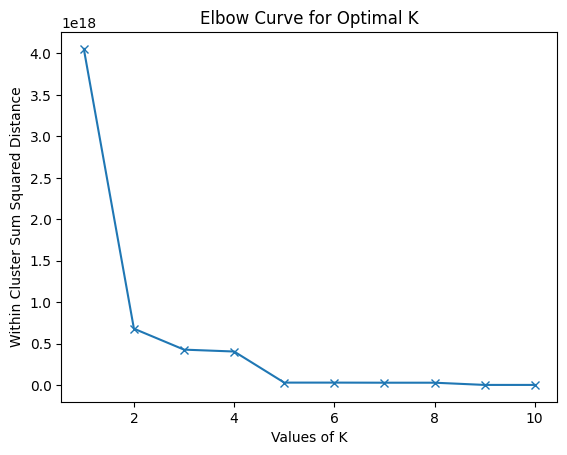

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 2 clusters: 0.9996625548540939
Davies-Bouldin Index for 2 clusters: 0.33365224616928235

Silhouette Score for 3 clusters: 0.997949826550596
Davies-Bouldin Index for 3 clusters: 0.3833624800619495



In [13]:
from sklearn.cluster import KMeans #K-Means Clustering
import scipy.cluster.hierarchy as sch # For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus # For Agglomerative & K-Means Clustering
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore # For Clustering Model Evaluation
import matplotlib.pyplot as plt

# 2.1.1. Determine Value of 'K' in K-Means using Elbow Curve & KMeans-Inertia

'''
KMeans-Inertia : Sum of Squared Distances of Samples to their closest Cluster Center (Centroid), Weighted by the Sample Weights (if provided)
'''
train_new_df=train_df[['Rating','Price','Minimum Installs','Category_code', 'Currency_code', 'Minimum Android_code', 'Content Rating_code', 'Free_code', 'Ad Supported_code', 'In App Purchases_code','Editors Choice_code']]
wcssd = [] # Within-Cluster-Sum-Squared-Distance
nr_clus = range(1,11) # Number of Clusters
for k in nr_clus:
    kmeans = KMeans(n_clusters=k, init='random', random_state=111)
    kmeans.fit(train_new_df)
    wcssd.append(kmeans.inertia_)
plt.plot(nr_clus, wcssd, marker='x')
plt.xlabel('Values of K')
plt.ylabel('Within Cluster Sum Squared Distance')
plt.title('Elbow Curve for Optimal K')
plt.show()

km_2cluster = KMeans(n_clusters=2, init='random', random_state=222)
km_2cluster_model = km_2cluster.fit_predict(train_new_df)

km_3cluster = kmclus(n_clusters=3, init='random', random_state=333)
km_3cluster_model = km_3cluster.fit_predict(train_new_df)

sscore_km_2cluster = sscore(train_new_df, km_2cluster_model);
print(f"Silhouette Score for 2 clusters: {sscore_km_2cluster}")
dbscore_km_2cluster = dbscore(train_new_df, km_2cluster_model);
print(f"Davies-Bouldin Index for 2 clusters: {dbscore_km_2cluster}\n")
sscore_km_3cluster = sscore(train_new_df, km_3cluster_model)
print(f"Silhouette Score for 3 clusters: {sscore_km_3cluster}")
dbscore_km_3cluster = dbscore(train_new_df, km_3cluster_model)
print(f"Davies-Bouldin Index for 3 clusters: {dbscore_km_3cluster}\n")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Size of Clusters (K-Means): [74985     6]
Size of Clusters (DBSCAN): [ 11  18 152 ...   5   5   5]

Comparison on Memory and Time Taken:
Time taken by K-Means: 0.6740 seconds
Memory used by K-Means: 4.95 MB

Time taken by DBSCAN: 11.8975 seconds
Memory used by DBSCAN: 27.25 MB


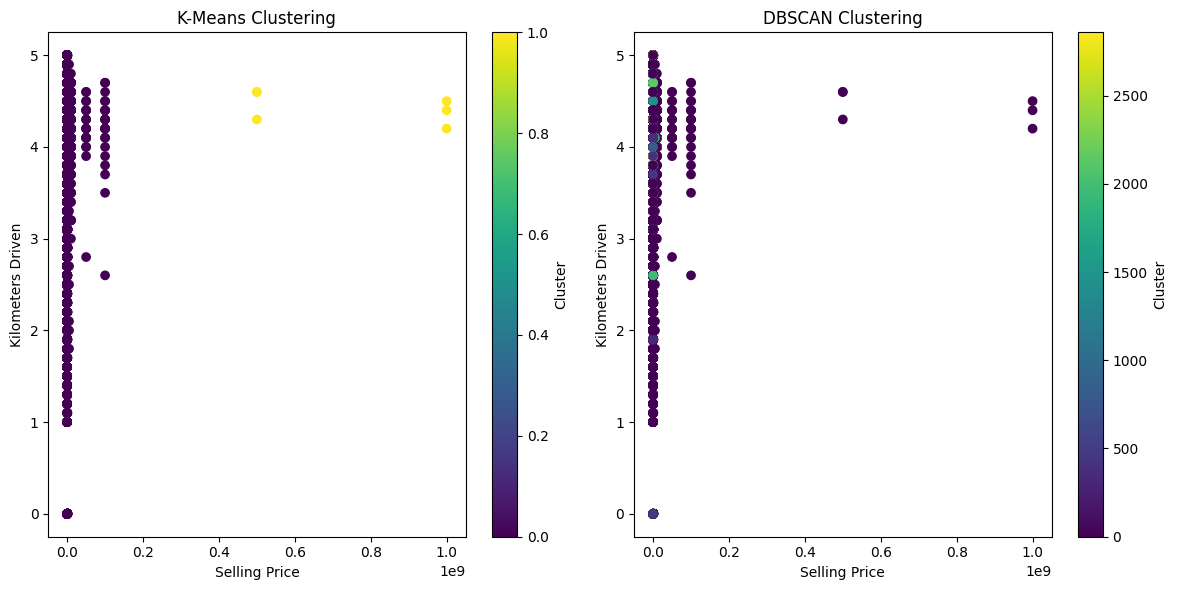

In [14]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_blobs
import psutil

# Generate synthetic data
train_new_df=train_df[['Rating','Price','Minimum Installs','Category_code', 'Currency_code', 'Minimum Android_code', 'Content Rating_code', 'Free_code', 'Ad Supported_code', 'In App Purchases_code','Editors Choice_code']]

# Initialize K-Means object
kmeans = KMeans(n_clusters=2, random_state=42)

# Initialize DBSCAN object
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Measure memory before clustering
mem_before = psutil.Process().memory_info().rss / 1024**2  # Memory usage in MB

# K-Means clustering
start_time = time.time()
kmeans.fit(train_new_df)
kmeans_time = time.time() - start_time

# Measure memory after K-Means clustering
mem_after_kmeans = psutil.Process().memory_info().rss / 1024**2

# DBSCAN clustering
start_time = time.time()
dbscan.fit(train_new_df)
dbscan_time = time.time() - start_time

# Measure memory after DBSCAN clustering
mem_after_dbscan = psutil.Process().memory_info().rss / 1024**2

# Get cluster labels
kmeans_cluster_labels = kmeans.labels_
dbscan_cluster_labels = dbscan.labels_

# Calculate cluster sizes
kmeans_cluster_sizes = np.bincount(kmeans_cluster_labels[kmeans_cluster_labels >= 0])
dbscan_cluster_sizes = np.bincount(dbscan_cluster_labels[dbscan_cluster_labels >= 0])

# Composition of each cluster (for K-Means, we can use centroids)
kmeans_centroids = kmeans.cluster_centers_

# Print results
print("Size of Clusters (K-Means):", kmeans_cluster_sizes)
print("Size of Clusters (DBSCAN):", dbscan_cluster_sizes)

print("\nComparison on Memory and Time Taken:")
print("Time taken by K-Means: {:.4f} seconds".format(kmeans_time))
print("Memory used by K-Means: {:.2f} MB".format(mem_after_kmeans - mem_before))
print("\nTime taken by DBSCAN: {:.4f} seconds".format(dbscan_time))
print("Memory used by DBSCAN: {:.2f} MB".format(mem_after_dbscan - mem_before))

# Plot clusters for K-Means
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(train_new_df['Minimum Installs'], train_new_df['Rating'], c=kmeans_cluster_labels, cmap='viridis')
#plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], marker='x', s=100, color='red')
plt.title('K-Means Clustering')
plt.xlabel('Selling Price')
plt.ylabel('Kilometers Driven')
plt.colorbar(label='Cluster')

# Plot clusters for DBSCAN
plt.subplot(1, 2, 2)
plt.scatter(train_new_df['Minimum Installs'], train_new_df['Rating'], c=dbscan_cluster_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Selling Price')
plt.ylabel('Kilometers Driven')
plt.colorbar(label='Cluster')

plt.tight_layout()
plt.show()

Index(['Rating', 'Price', 'Minimum Installs', 'Category_code', 'Currency_code',
       'Minimum Android_code', 'Content Rating_code', 'Free_code',
       'Ad Supported_code', 'In App Purchases_code', 'Editors Choice_code'],
      dtype='object')


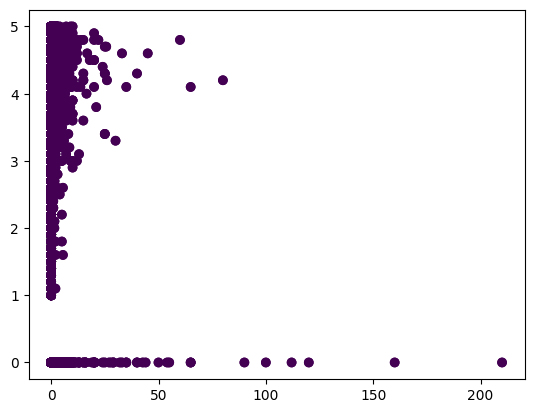

In [19]:
print(train_new_df.columns)
plt.scatter(train_new_df['Price'], train_new_df['Rating'], c=kmeans_cluster_labels, cmap='viridis')
if 'Price' in train_new_df.columns:
    plt.scatter(train_new_df['Price'], train_new_df['Rating'], c=kmeans_cluster_labels, cmap='viridis')
else:
    # Handle the case where 'Rating Count' column is missing
    print("'Rating Count' column not found in the DataFrame")

**REPORT FOR MLM PROJECT 1 (K MEANS)**

**A. OBJECTIVE:**

The objective of this project is to preprocess and analyze Google Playstore Apps dataset, perform missing data treatment, encode categorical variables, and apply clustering techniques to identify patterns in the data. The final step is to present the findings in a comprehensive report.


**B. INSIGHTS:**
1. Missing Data Treatment:
- Categorical Data: Imputed missing values using the most frequent strategy (mode).
- Non-Categorical Data: Imputed missing values using the most frequent strategy (mode).

2. Data Encoding:
- Ordinal Encoding: Utilized the scikit-learn Ordinal Encoder to numerically encode categorical variables.

3. Data Transformation & Rescaling:
- Standardization: Applied Standard Scaler to rescale non-categorical data, ensuring uniformity in scale.

4. Clustering:
- K-Means Clustering: Determined the optimal number of clusters using the elbow method and evaluated performance with silhouette score and Davies-Bouldin index.


**C. ANALYSIS:**
- Explored K-Means clustering with two and three clusters.
- Utilized the elbow method to identify the optimal number of clusters.
- Evaluated clustering performance using silhouette score and Davies-Bouldin index.


**D. CONCLUSION:**
- K-Means clustering with two clusters yielded a higher silhouette score and lower Davies-Bouldin index, indicating better separation.
- DBSCAN clustering was also implemented to compare its performance.


**E. MANAGERIAL IMPLICATIONS:**
- Understanding app clusters can aid in targeted marketing strategies.
- Insights from clustering can influence app development and feature prioritization.


**F. RECOMMENDATIONS:**
- Continue exploring alternative clustering algorithms for comparison.
- Conduct further analysis on each cluster to identify specific characteristics.
- Explore additional features and their impact on clustering.
- Incorporate user reviews and engagement metrics for a more comprehensive analysis.